<h2 align="center"> Univariate Linear Regression </h2>

### Load the Data and Libraries

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns 

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_bike = pd.read_csv("bike_sharing_data.txt")
df_bike.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df_bike.shape

(97, 2)

### Visualize the Data

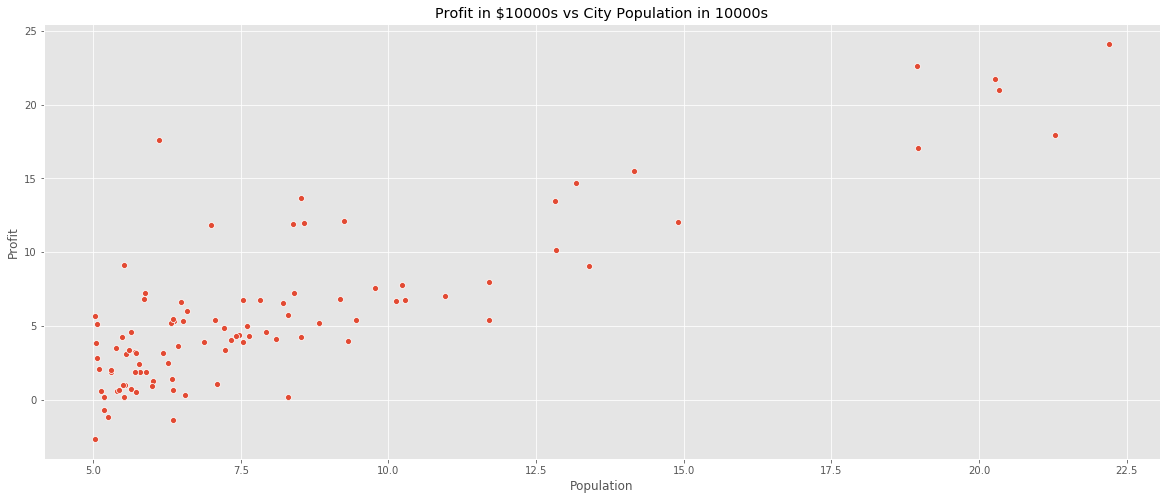

In [4]:
fig = plt.figure(figsize = (20, 8))
ax = sns.scatterplot(x = "Population", y = "Profit", data = df_bike)
ax.set_title("Profit in $10000s vs City Population in 10000s")

### Compute the Cost 

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [5]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [6]:
m = df_bike.Population.values.size
X = np.append(np.ones((m, 1)), df_bike.Population.values.reshape(m, 1), axis = 1)
y = df_bike.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [8]:
theta, costs= gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)

print(" h(x) = {} + {}x1 ".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))                              

 h(x) = -3.79 + 1.18x1 


### Plotting the Convergence

Plot $J(\theta)$ against the number of iterations of gradient descent:

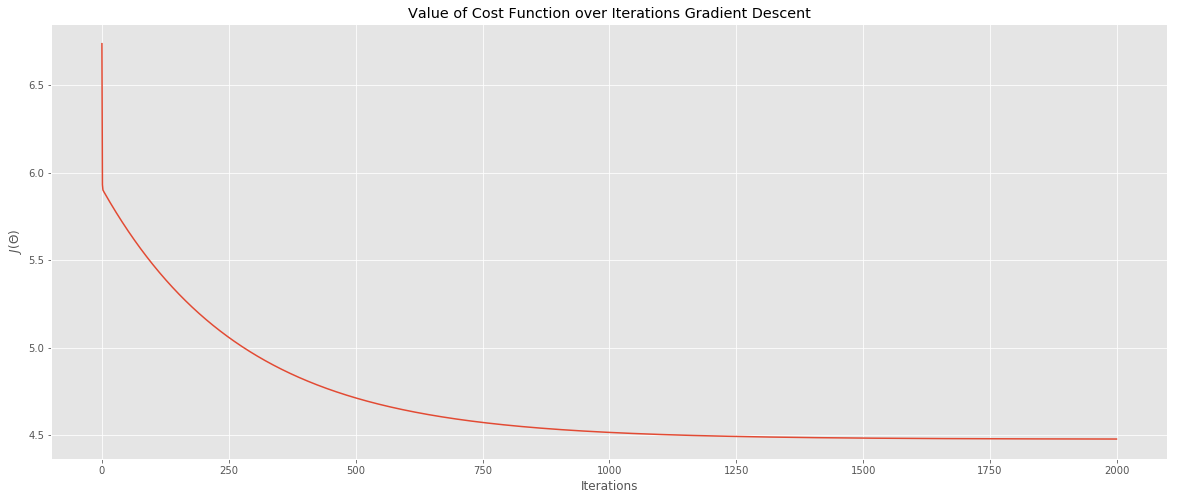

In [9]:
fig = plt.figure(figsize = (20, 8))
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Value of Cost Function over Iterations Gradient Descent")

### Training Data with Linear Regression Fit

In [10]:
theta.shape

(2, 1)

In [11]:
theta

array([[-3.78806857],
       [ 1.18221277]])

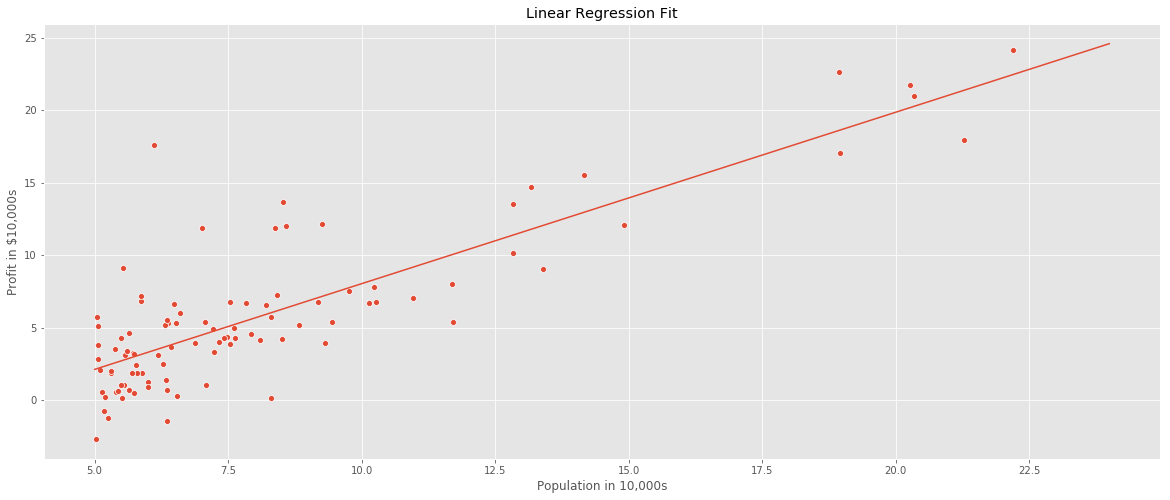

In [12]:
fig = plt.figure(figsize = (20, 8))
theta = np.squeeze(theta)
ax = sns.scatterplot(x = "Population", y = "Profit", data = df_bike)

x_value = [X for X in range(5, 25)]
y_value = [(X * theta[1] + theta[0]) for X in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")


### Inference using the optimized $\theta$ values

$h_\theta(x) = \theta^Tx$

In [13]:
def predict(X, theta):
    y_pred = np.dot(theta.transpose(), X)
    return y_pred

In [14]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [15]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
